In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [3]:
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")
sub = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv")
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
# pd.options.display.max_rows = 999
# train.tail(100)

In [5]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

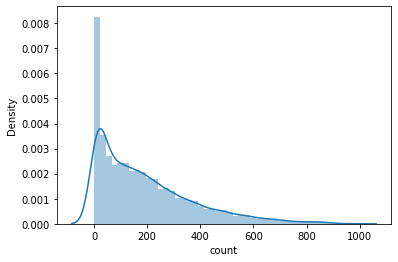

In [6]:
import seaborn as sns

sns.distplot(train['count'])

In [7]:
# sns.distplot(np.log(train['count']))

In [8]:
train_corr = train.corr()['count'].sort_values()
train_corr

humidity     -0.317371
weather      -0.128655
holiday      -0.005393
workingday    0.011594
windspeed     0.101369
season        0.163439
atemp         0.389784
temp          0.394454
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

In [9]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [10]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [11]:
train['hour'] = train['datetime'].dt.hour
train['year'] = train['datetime'].dt.year
train['weekday'] = train['datetime'].dt.weekday


test['hour'] = test['datetime'].dt.hour
test['year'] = test['datetime'].dt.year
test['weekday'] = test['datetime'].dt.weekday

In [12]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,2012,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,2012,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,2012,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,2012,2


In [14]:
workingday_df = train[train['workingday'] == 1] 
weekend_df = train[train['workingday'] == 0]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hour', ylabel='count'>

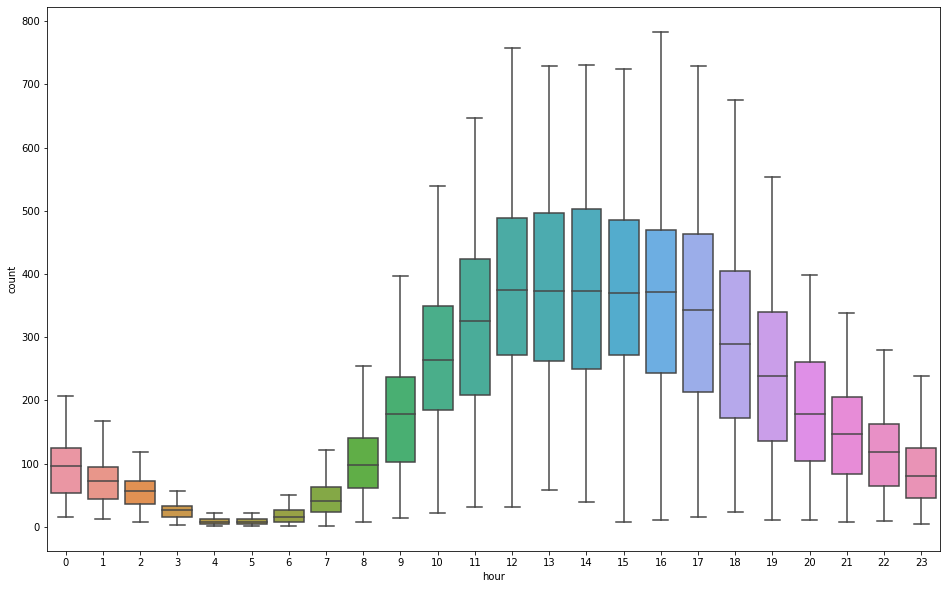

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,10))
sns.boxplot(weekend_df['hour'], weekend_df['count'], showfliers = False)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hour', ylabel='count'>

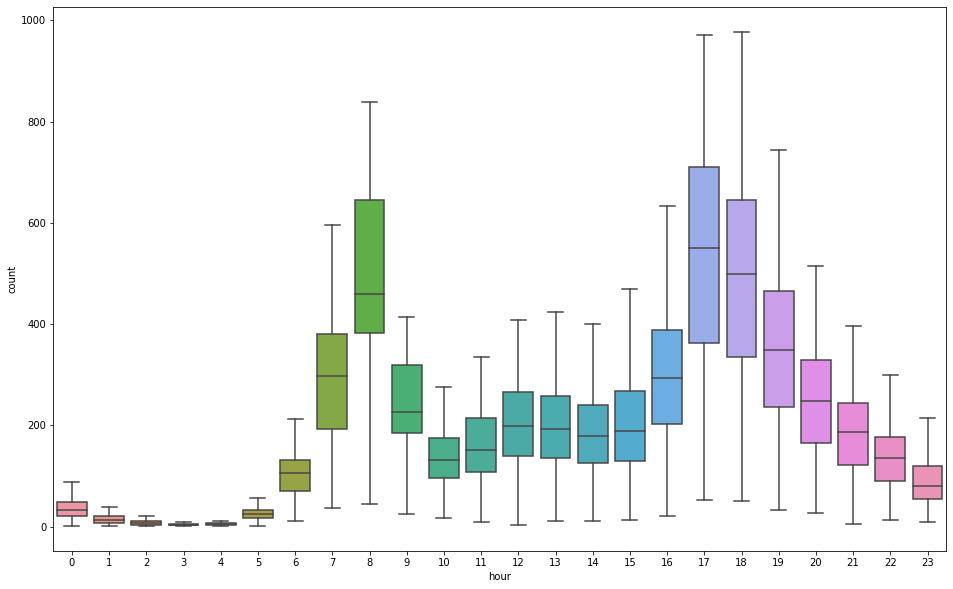

In [17]:
plt.figure(figsize = (16,10))
sns.boxplot(workingday_df['hour'], workingday_df['count'], showfliers = False)

In [19]:
train2 = train.drop(columns = ['datetime', 'casual', 'registered', 'count'])
test2 = test.drop(columns = ['datetime'])

In [20]:
train2.shape

(10886, 11)

In [21]:
test2.shape

(6493, 11)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [28]:
rf = RandomForestRegressor()
rf.fit(train2, np.log(train['count']))

RandomForestRegressor()

In [33]:
model = XGBRegressor(learning_rate = 0.1)
model.fit(train2, np.log(train['count']))
result = model.predict(test2)

In [29]:
# result = rf.predict(test2)
# result

array([2.45388768, 1.49633598, 1.13145074, ..., 4.60568256, 4.59624765,
       3.85450465])

In [25]:
sub

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [34]:
sub['count'] = np.exp(result)
sub

,datetime,count
0,2011-01-20 00:00:00,13.260538
1,2011-01-20 01:00:00,4.641706
2,2011-01-20 02:00:00,2.966422
3,2011-01-20 03:00:00,1.744935
4,2011-01-20 04:00:00,1.590809
...,...,...
6488,2012-12-31 19:00:00,210.928558
6489,2012-12-31 20:00:00,130.723587
6490,2012-12-31 21:00:00,107.472717
6491,2012-12-31 22:00:00,84.004875


In [35]:
sub.to_csv('xgb-log.csv', index = False)